In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
df = pd.read_excel('Account Sales Data for Analysis v2 - Copy.xlsx', sheet_name = 'Data')

In [3]:
df = df.drop(columns = 'Unnamed: 17')

In [4]:
df.head(2)

,Account Name,Account Address,Decision Maker,Phone Number,Account Type,Regular,Sugar Free,Yellow Edition,Cooler?,Digital screen?,Menu inclusion?,Posters?,2017,2018,2019,2020,2021
0,Bar 1,"2131 Patterson Road, Brooklyn NY 11201",Dorothy Rizzo,(880) 283-6803,Bar,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1982,5388,7063,7208,9093
1,Bar 2,"3685 Morningview Lane, New York NY 10013",Lawson Moore,(711) 426-7350,Bar,Yes,Yes,Yes,No,Yes,Yes,Yes,2786,3804,4121,6210,6909


In [5]:
# info about the data

In [6]:
df.shape

(60, 17)

In [7]:
df.isna().sum()

Account Name       0
Account Address    0
Decision Maker     0
Phone Number       0
Account Type       0
Regular            0
Sugar Free         0
Yellow Edition     0
Cooler?            0
Digital screen?    0
Menu inclusion?    0
Posters?           0
2017               0
2018               0
2019               0
2020               0
2021               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Account Name     60 non-null     object
 1   Account Address  60 non-null     object
 2   Decision Maker   60 non-null     object
 3   Phone Number     60 non-null     object
 4   Account Type     60 non-null     object
 5   Regular          60 non-null     object
 6   Sugar Free       60 non-null     object
 7   Yellow Edition   60 non-null     object
 8   Cooler?          60 non-null     object
 9   Digital screen?  60 non-null     object
 10  Menu inclusion?  60 non-null     object
 11  Posters?         60 non-null     object
 12  2017             60 non-null     int64 
 13  2018             60 non-null     int64 
 14  2019             60 non-null     int64 
 15  2020             60 non-null     int64 
 16  2021             60 non-null     int64 
dtypes: int64(5), object(12)
memory usage:

In [10]:
df.describe()

,2017,2018,2019,2020,2021
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3166.266667,4049.916667,4807.483333,5837.233333,6819.900000
std,3314.536544,2391.066235,1959.524730,2314.301032,3158.238378
min,24.000000,286.000000,747.000000,338.000000,44.000000
25%,831.250000,2066.250000,3526.250000,4350.000000,4866.250000
50%,1459.000000,3861.500000,4684.000000,6014.500000,8239.000000
75%,6194.250000,5841.000000,6258.250000,7900.500000,9288.500000
max,9791.000000,9610.000000,8390.000000,9024.000000,9983.000000


In [11]:
# correlations

In [12]:
# df we are going to use
df.columns

Index([   'Account Name', 'Account Address',  'Decision Maker',
          'Phone Number',    'Account Type',         'Regular',
            'Sugar Free',  'Yellow Edition',         'Cooler?',
       'Digital screen?', 'Menu inclusion?',        'Posters?',
                    2017,              2018,              2019,
                    2020,              2021],
      dtype='object')

In [13]:
df1 = df[['Regular', 'Sugar Free',  'Yellow Edition', 'Cooler?', 'Digital screen?', 'Menu inclusion?', 'Posters?',
 2017, 2018, 2019, 2020, 2021]]
df1.head(2)

,Regular,Sugar Free,Yellow Edition,Cooler?,Digital screen?,Menu inclusion?,Posters?,2017,2018,2019,2020,2021
0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1982,5388,7063,7208,9093
1,Yes,Yes,Yes,No,Yes,Yes,Yes,2786,3804,4121,6210,6909


In [14]:
num = pd.get_dummies(data=df1,columns=['Regular', 'Sugar Free',  'Yellow Edition', 'Cooler?', 'Digital screen?', 'Menu inclusion?', 'Posters?'])
num.head

<bound method NDFrame.head of     2017  2018  2019  2020  2021  Regular_Yes  Sugar Free_No  Sugar Free_Yes  \
0   1982  5388  7063  7208  9093            1              0               1   
1   2786  3804  4121  6210  6909            1              0               1   
2   1209  1534  1634  4302  9768            1              0               1   
3    906  1251  2897  4499  9428            1              0               1   
4   1421  1893  2722  4410  5873            1              0               1   
5   2341  6105  7777  7891  8758            1              0               1   
6   9252  8499   991   448   211            1              1               0   
7   1581  4799  6582  9024  9759            1              0               1   
8   9766  8049  5556  5202  2373            1              1               0   
9   1530  1620  2027  4881  6002            1              0               1   
10  7555  6551  5188  3436  2359            1              1               0   
11  1532  

In [15]:
num.columns

Index([                 2017,                  2018,                  2019,
                        2020,                  2021,         'Regular_Yes',
             'Sugar Free_No',      'Sugar Free_Yes',   'Yellow Edition_No',
        'Yellow Edition_Yes',          'Cooler?_No',         'Cooler?_Yes',
        'Digital screen?_No', 'Digital screen?_Yes',  'Menu inclusion?_No',
       'Menu inclusion?_Yes',         'Posters?_No',        'Posters?_Yes'],
      dtype='object')

In [16]:
num = num.drop(columns = ['Regular_Yes'])

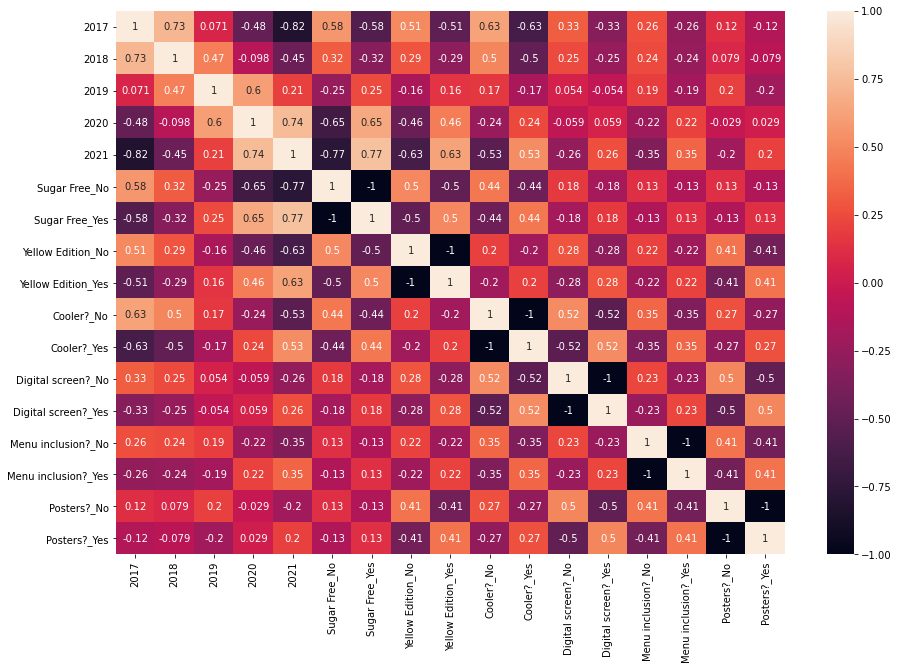

In [29]:
correlation_matrix = num.corr(method = 'pearson')

fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(correlation_matrix, annot = True)

plt.show()

In [18]:
num.corr()

,2017,2018,2019,2020,2021,Sugar Free_No,Sugar Free_Yes,Yellow Edition_No,Yellow Edition_Yes,Cooler?_No,Cooler?_Yes,Digital screen?_No,Digital screen?_Yes,Menu inclusion?_No,Menu inclusion?_Yes,Posters?_No,Posters?_Yes
2017,1.000000,0.725608,0.070595,-0.478991,-0.822726,0.575177,-0.575177,0.513245,-0.513245,0.625621,-0.625621,0.327493,-0.327493,0.261267,-0.261267,0.119817,-0.119817
2018,0.725608,1.000000,0.467667,-0.097915,-0.452529,0.319987,-0.319987,0.287910,-0.287910,0.496646,-0.496646,0.247844,-0.247844,0.244312,-0.244312,0.078504,-0.078504
2019,0.070595,0.467667,1.000000,0.604161,0.209513,-0.246077,0.246077,-0.155239,0.155239,0.166730,-0.166730,0.054215,-0.054215,0.190396,-0.190396,0.201274,-0.201274
2020,-0.478991,-0.097915,0.604161,1.000000,0.742993,-0.652212,0.652212,-0.455423,0.455423,-0.240468,0.240468,-0.058902,0.058902,-0.215787,0.215787,-0.029155,0.029155
2021,-0.822726,-0.452529,0.209513,0.742993,1.000000,-0.773884,0.773884,-0.626624,0.626624,-0.527631,0.527631,-0.258554,0.258554,-0.349437,0.349437,-0.197151,0.197151
Sugar Free_No,0.575177,0.319987,-0.246077,-0.652212,-0.773884,1.000000,-1.000000,0.500000,-0.500000,0.437237,-0.437237,0.176777,-0.176777,0.127294,-0.127294,0.129452,-0.129452
Sugar Free_Yes,-0.575177,-0.319987,0.246077,0.652212,0.773884,-1.000000,1.000000,-0.500000,0.500000,-0.437237,0.437237,-0.176777,0.176777,-0.127294,0.127294,-0.129452,0.129452
Yellow Edition_No,0.513245,0.287910,-0.155239,-0.455423,-0.626624,0.500000,-0.500000,1.000000,-1.000000,0.201802,-0.201802,0.282843,-0.282843,0.218218,-0.218218,0.406850,-0.406850
Yellow Edition_Yes,-0.513245,-0.287910,0.155239,0.455423,0.626624,-0.500000,0.500000,-1.000000,1.000000,-0.201802,0.201802,-0.282843,0.282843,-0.218218,0.218218,-0.406850,0.406850
Cooler?_No,0.625621,0.496646,0.166730,-0.240468,-0.527631,0.437237,-0.437237,0.201802,-0.201802,1.000000,-1.000000,0.523217,-0.523217,0.352294,-0.352294,0.271189,-0.271189


In [19]:
#Compare values to find out the highest correlation between them
#We use unstack method to create the relatioship between the values

In [20]:
correlation_mat = num.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

2017          2017                   1.000000
              2018                   0.725608
              2019                   0.070595
              2020                  -0.478991
              2021                  -0.822726
                                       ...   
Posters?_Yes  Digital screen?_Yes    0.496912
              Menu inclusion?_No    -0.411625
              Menu inclusion?_Yes    0.411625
              Posters?_No           -1.000000
              Posters?_Yes           1.000000
Length: 289, dtype: float64

In [21]:
#Now we can pair the values
#We do that by sorting them
#sorted_values() method sorts a df in asc or desc order

In [22]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Yellow Edition_No   Yellow Edition_Yes    -1.0
Digital screen?_No  Digital screen?_Yes   -1.0
Posters?_No         Posters?_Yes          -1.0
Yellow Edition_Yes  Yellow Edition_No     -1.0
Posters?_Yes        Posters?_No           -1.0
                                          ... 
2020                2020                   1.0
2019                2019                   1.0
2018                2018                   1.0
Posters?_No         Posters?_No            1.0
Posters?_Yes        Posters?_Yes           1.0
Length: 289, dtype: float64

In [23]:
#Now we want to find the highest correlations (>0.5)

In [24]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

2017                 Yellow Edition_No      0.513245
Yellow Edition_No    2017                   0.513245
Digital screen?_Yes  Cooler?_Yes            0.523217
Cooler?_No           Digital screen?_No     0.523217
Digital screen?_No   Cooler?_No             0.523217
Cooler?_Yes          Digital screen?_Yes    0.523217
2021                 Cooler?_Yes            0.527631
Cooler?_Yes          2021                   0.527631
Sugar Free_No        2017                   0.575177
2017                 Sugar Free_No          0.575177
2020                 2019                   0.604161
2019                 2020                   0.604161
Cooler?_No           2017                   0.625621
2017                 Cooler?_No             0.625621
Yellow Edition_Yes   2021                   0.626624
2021                 Yellow Edition_Yes     0.626624
2020                 Sugar Free_Yes         0.652212
Sugar Free_Yes       2020                   0.652212
2017                 2018                   0.

In [27]:
high_correlations = pd.read_excel('Correlations.xlsx', sheet_name = 'Sheet1')
high_correlations

,Value 1,Value 2,Corr
0,2017,Yellow Edition_No,0.513245
1,2017,Sugar Free_No,0.575177
2,2017,Cooler?_No,0.625621
3,2020,Sugar Free_Yes,0.652212
4,2021,Cooler?_Yes,0.527631
5,2021,Yellow Edition_Yes,0.626624
6,2021,Sugar Free_Yes,0.773884
